In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas.plotting

In [2]:
old_data = pd.read_csv('final_dataset 2.csv')
data = old_data[['FTR','HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts','HM1', 'HM2','HM3','HM4','HM5','AM1','AM2','AM3','AM4','AM5']]
data.columns = ['Result','HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts','H1', 'H2','H3','H4','H5','A1','A2','A3','A4','A5']
y = pd.get_dummies(data["Result"])
y = y[['H']]
y = np.ravel(y)
display(data)
print(y)

,Result,HTGD,ATGD,HTP,ATP,DiffFormPts,DiffPts,H1,H2,H3,H4,H5,A1,A2,A3,A4,A5
0,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
1,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
2,NH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
3,NH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
4,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,H,-0.289474,0.710526,1.078947,1.842105,-0.263158,-0.763158,L,L,L,L,W,D,W,W,W,W
6836,NH,-0.473684,2.052632,0.947368,2.552632,-0.131579,-1.605263,W,D,W,D,L,W,D,W,W,W
6837,NH,-0.710526,-0.894737,0.868421,0.789474,-0.052632,0.078947,L,L,L,L,D,L,D,D,D,L
6838,H,0.973684,-0.078947,1.947368,1.236842,0.078947,0.710526,W,L,W,D,L,W,L,L,D,L


[ True  True False ... False  True  True]


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>,
        <Axes: xlabel='DiffPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>,
        <Axes: xlabel='DiffPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>,
        <Axes: xlabel='DiffPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xl

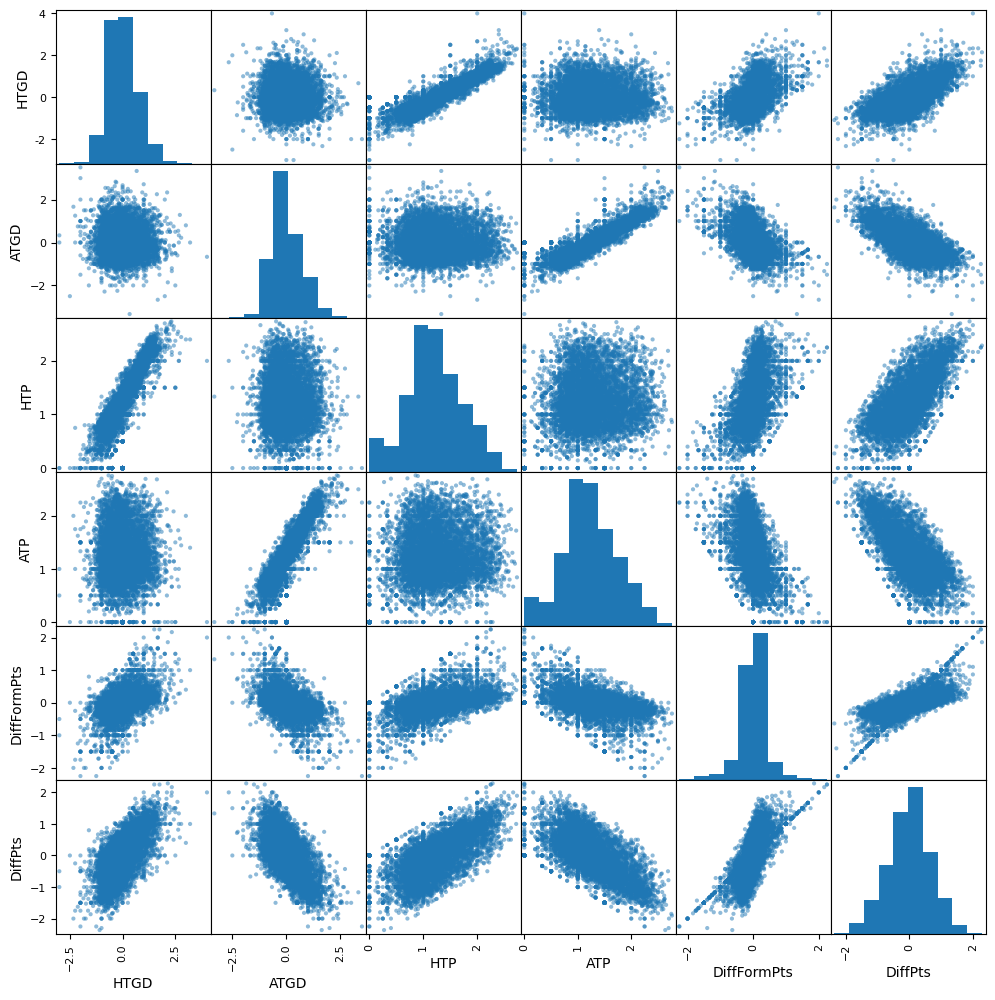

In [3]:
# To check whether the features I chose have enough correlation with the label (FTR - Full Time Result)
pd.plotting.scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffPts']], figsize=(12, 12))

In [6]:
# Create the feature for the dataset
# Assuming 'Result' is the correct column name
X = data.drop(['Result'], axis=1)  # axis=1 indicates that you are dropping a column
print(X)

          HTGD      ATGD       HTP       ATP  DiffFormPts   DiffPts H1 H2 H3  \
0     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
1     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
2     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
3     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
4     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  M  M  M   
...        ...       ...       ...       ...          ...       ... .. .. ..   
6835 -0.289474  0.710526  1.078947  1.842105    -0.263158 -0.763158  L  L  L   
6836 -0.473684  2.052632  0.947368  2.552632    -0.131579 -1.605263  W  D  W   
6837 -0.710526 -0.894737  0.868421  0.789474    -0.052632  0.078947  L  L  L   
6838  0.973684 -0.078947  1.947368  1.236842     0.078947  0.710526  W  L  W   
6839 -0.578947 -0.315789  1.026316  1.289474    -0.105263 -0.263158  D  W  L   

     H4 H5 A1 A2 A3 A4 A5  
0     M  M 

In [8]:
X_new = pd.DataFrame(index=X.index)
for col, col_data in X.items():
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix=col)  # Convert categorical into dummy values
    X_new = X_new.join(col_data)
print(X_new)
X = X_new
print(X)

          HTGD      ATGD       HTP       ATP  DiffFormPts   DiffPts   H1_D  \
0     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  False   
1     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  False   
2     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  False   
3     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  False   
4     0.000000  0.000000  0.000000  0.000000     0.000000  0.000000  False   
...        ...       ...       ...       ...          ...       ...    ...   
6835 -0.289474  0.710526  1.078947  1.842105    -0.263158 -0.763158  False   
6836 -0.473684  2.052632  0.947368  2.552632    -0.131579 -1.605263  False   
6837 -0.710526 -0.894737  0.868421  0.789474    -0.052632  0.078947  False   
6838  0.973684 -0.078947  1.947368  1.236842     0.078947  0.710526  False   
6839 -0.578947 -0.315789  1.026316  1.289474    -0.105263 -0.263158   True   

       H1_L   H1_M   H1_W  ...   A3_M   A3_W   A4_D   A4_L   A4

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)

clf = LogisticRegression(C=10000)

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
acc_train1 = accuracy_score(y_train, y_pred_train)
loss1 = log_loss(y_train, y_pred_train)
print("Logistic Regression")
print("The training accuracy of the model is ", acc_train1)
print("The training loss for the model is ", loss1)


clf.fit(X_val, y_val)
y_pred_val = clf.predict(X_val)
loss2 = log_loss(y_val, y_pred_val)
acc_train2 = accuracy_score(y_val, y_pred_val)
print("The validation accuracy of the model is ", acc_train2)
print("The validation loss for the model is ", loss2)


clf.fit(X_test, y_test)
y_pred_test = clf.predict(X_test)
loss3 = log_loss(y_test, y_pred_test)
acc_train3 = accuracy_score(y_test, y_pred_test)
print("The test accuracy of the model is ", acc_train3)
print("The test loss for the model is: ", loss3)

Logistic Regression
The training accuracy of the model is  0.6465643274853801
The training loss for the model is  12.739112875466478
The validation accuracy of the model is  0.6900584795321637
The validation loss for the model is  11.17142473463865
The test accuracy of the model is  0.6710526315789473
The test loss for the model is:  11.856464930630642


In [26]:
from sklearn.metrics import classification_report, roc_auc_score

# Example using classification report
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example using AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.75      0.71       372
        True       0.66      0.57      0.61       312

    accuracy                           0.67       684
   macro avg       0.67      0.66      0.66       684
weighted avg       0.67      0.67      0.67       684

AUC-ROC Score: 0.6632030603804797


In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Example using class_weight parameter
clf2= DecisionTreeClassifier(random_state=0, class_weight='balanced')
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
acc_train1 = accuracy_score(y_train, y_pred_train)
loss1 = log_loss(y_train, y_pred_train)
print("Decision Tree")
print("The training accuracy of the model is ", acc_train1)
print("The training loss for the model is ", loss1)

y_pred_val = clf2.predict(X_val)
acc_train2 = accuracy_score(y_val, y_pred_val)
loss2 = log_loss(y_val, y_pred_val)
print("The validation accuracy of the model is ", acc_train2)
print("The validation loss for the model is ", loss2)

y_pred_test = clf2.predict(X_test)
acc_train3 = accuracy_score(y_test, y_pred_test)
loss3 = log_loss(y_test, y_pred_test)
print("The test accuracy of the model is ", acc_train3)
print("The test loss for the model is ", loss3)

Decision Tree
The training accuracy of the model is  0.9798976608187134
The training loss for the model is  0.7245617457607617
The validation accuracy of the model is  0.554093567251462
The validation loss for the model is  16.07209690596598
The test accuracy of the model is  0.5701754385964912
The test loss for the model is  15.49244750935737


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Example using classification report
y_pred = clf2.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example using AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.61      0.61       372
        True       0.53      0.52      0.52       312

    accuracy                           0.57       684
   macro avg       0.57      0.57      0.57       684
weighted avg       0.57      0.57      0.57       684

AUC-ROC Score: 0.5660669975186103


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Example Random Forest classifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
y_pred_train = rf_clf.predict(X_train)
acc_train1 = accuracy_score(y_train, y_pred_train)
loss1 = log_loss(y_train, y_pred_train)
print("Decision Tree")
print("The training accuracy of the model is ", acc_train1)
print("The training loss for the model is ", loss1)

y_pred_val = rf_clf.predict(X_val)
acc_train2 = accuracy_score(y_val, y_pred_val)
loss2 = log_loss(y_val, y_pred_val)
print("The validation accuracy of the model is ", acc_train2)
print("The validation loss for the model is ", loss2)

y_pred_test = rf_clf.predict(X_test)
acc_train3 = accuracy_score(y_test, y_pred_test)
loss3 = log_loss(y_test, y_pred_test)
print("The test accuracy of the model is ", acc_train3)
print("The test loss for the model is ", loss3)

Decision Tree
The training accuracy of the model is  0.9798976608187134
The training loss for the model is  0.7245617457607616
The validation accuracy of the model is  0.6242690058479532
The validation loss for the model is  13.542717720764779
The test accuracy of the model is  0.652046783625731
The test loss for the model is  12.541505126622633


In [24]:
from sklearn.metrics import classification_report, roc_auc_score

# Example using classification report
y_pred = rf_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example using AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.74      0.70       372
        True       0.64      0.55      0.59       312

    accuracy                           0.65       684
   macro avg       0.65      0.64      0.64       684
weighted avg       0.65      0.65      0.65       684

AUC-ROC Score: 0.6439205955334988


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [18]:
from sklearn.metrics import classification_report, roc_auc_score

# Example using classification report
y_pred = gb_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example using AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.79      0.73       372
        True       0.68      0.54      0.60       312

    accuracy                           0.68       684
   macro avg       0.68      0.66      0.66       684
weighted avg       0.68      0.68      0.67       684

AUC-ROC Score: 0.6646505376344085


In [22]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [23]:
from sklearn.metrics import classification_report, roc_auc_score

# Example using classification report
y_pred = nb_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example using AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.65      0.66       372
        True       0.60      0.63      0.62       312

    accuracy                           0.64       684
   macro avg       0.64      0.64      0.64       684
weighted avg       0.64      0.64      0.64       684

AUC-ROC Score: 0.6412324234904879
